<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:60px;background-color:#e13253;overflow:hidden;font-weight:800">Obesity Level</div>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/obesity-based-on-eating-habits-and-physical-cond/obesity.csv


## <b><div style='padding:15px;background-color:#e13253;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. 23% of the data was collected directly from users through a survey conducted by Fabio Mendoza Palechor and Alexis de la Hoz Manotas in a web platform and 77% of the data was generated synthetically using the Weka tool and the SMOTE filter.

**The data contains 19 attributes and 2111 records.**

Gender is 1 if a respondent is male and 0 if a respondent is female.

Age is a respondent’s age in years.

family_history_with_overweight is 1 if a respondent has family member who is or was overweight, 0 if not.

FAVC is 1 if a respondent eats high caloric food frequently, 0 if not.

FCVC is 1 if a respondent usually eats vegetables in their meals, 0 if not.

NCP represents how many main meals a respondent has daily (0 for 1-2 meals, 1 for 3 meals, and 2 for more than 3 meals).

CAEC represents how much food a respondent eats between meals on a scale of 0 to 3.

SMOKE is 1 if a respondent smokes, 0 if not.

CH2O represents how much water a respondent drinks on a scale of 0 to 2.

SCC is 1 if a respondent monitors their caloric intake, 0 if not.

FAF represents how much physical activity a respondent does on a scale of 0 to 3.

TUE represents how much time a respondent spends looking at devices with screens on a scale of 0 to 2.

CALC represents how often a respondent drinks alcohol on a scale of 0 to 3.

Automobile, Bike, Motorbike, Public_Transportation, and Walking indicate a respondent’s primary mode of transportation. Their primary mode of transportation is indicated by a 1 and the other columns will contain a 0.

NObeyesdad is a 1 if a patient is obese and a 0 if not.

## <b><div style='padding:15px;background-color:#e13253;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Import Libraries</div></b>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import plotly.express as ex
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#e13253;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Download Dataset</div></b>

In [3]:
df = pd.read_csv("/kaggle/input/obesity-based-on-eating-habits-and-physical-cond/obesity.csv")
df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,0,0,1,0,0
1,0,21.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,0,0,1,0,0
2,1,23.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,0,0,1,0,0
3,1,27.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,0,0,0,1,0
4,1,22.000000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1


## <b><div style='padding:15px;background-color:#e13253;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting Dataframe Structure</div></b>

In [4]:
# Check first 5 lines
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [5]:
# Check last 5 lines
df.tail()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1
2110,0,23.664709,1,1,3.0,3.0,1,0,2.863513,0,1.026452,0.714137,1,0,0,0,1,0,1


In [6]:
# Check Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [7]:
# Null Data
df.isna().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
Automobile                        0
Bike                              0
Motorbike                         0
Public_Transportation             0
Walking                           0
NObeyesdad                        0
dtype: int64

In [8]:
# Check row and column numbers
rows = df.shape[0] 
cols = df.shape[1] 
print("Rows   : " + str(rows)) 
print("Columns: " + str(cols))

Rows   : 2111
Columns: 19


In [9]:
# Check duplicate data
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 29


<div class="alert alert-block alert-info" style="background-color:#d5f4da;color:#e13253;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> Let's delete duplicate records.</div>

In [10]:
df.drop_duplicates(keep=False,inplace=True)

In [11]:
# Check duplicate data
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 0


In [12]:
# Number of unique values per column.
df.nunique()

Gender                               2
Age                               1402
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
Automobile                           2
Bike                                 2
Motorbike                            2
Public_Transportation                2
Walking                              2
NObeyesdad                           2
dtype: int64

In [13]:
# Check the unique values and frequency for 'NObeyesdad'
df['NObeyesdad'].value_counts()

NObeyesdad
0    1096
1     972
Name: count, dtype: int64

## <b><div style='padding:15px;background-color:#e13253;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

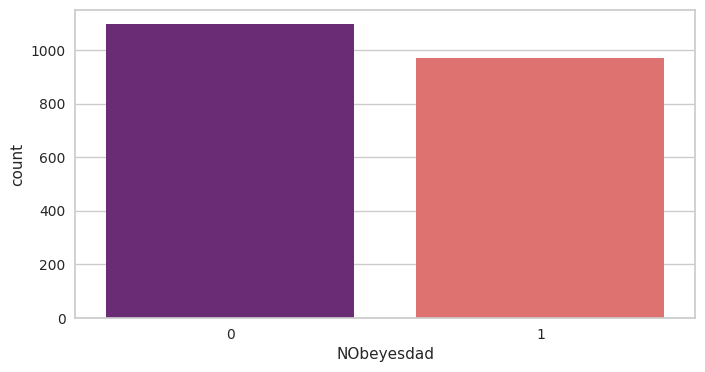

In [14]:
# NObeyesdad - Target Feature

fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["NObeyesdad"], palette="magma")
plt.show()

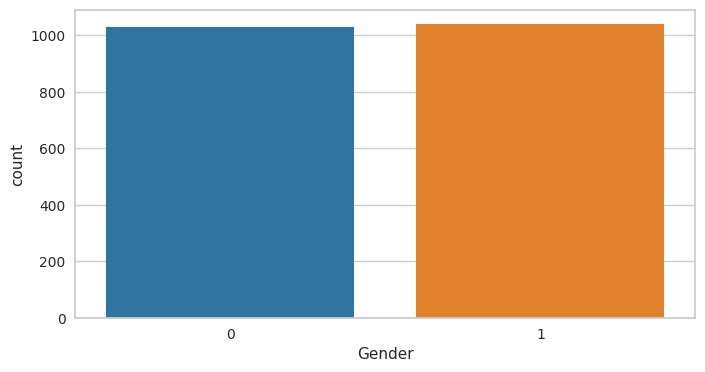

In [15]:
# Gender

fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["Gender"], palette="tab10")
plt.show()

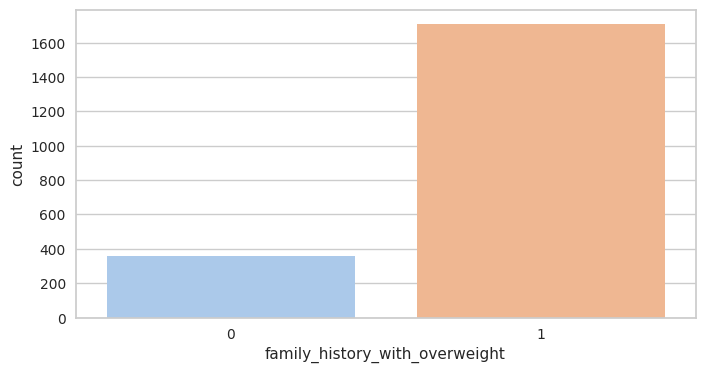

In [16]:
# family_history_with_overweight

fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["family_history_with_overweight"], palette="pastel")
plt.show()

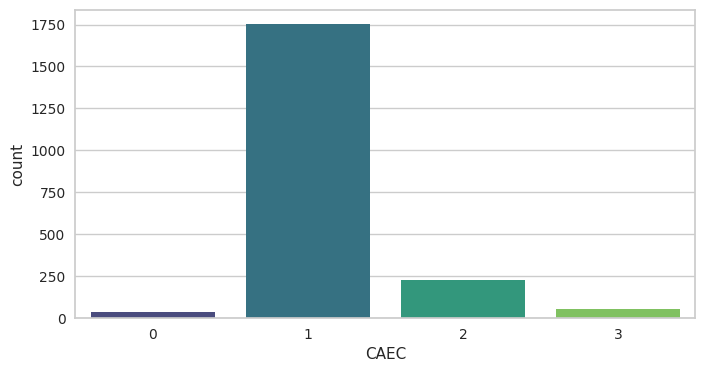

In [17]:
# CAEC

fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["CAEC"], palette="viridis")
plt.show()

In [18]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


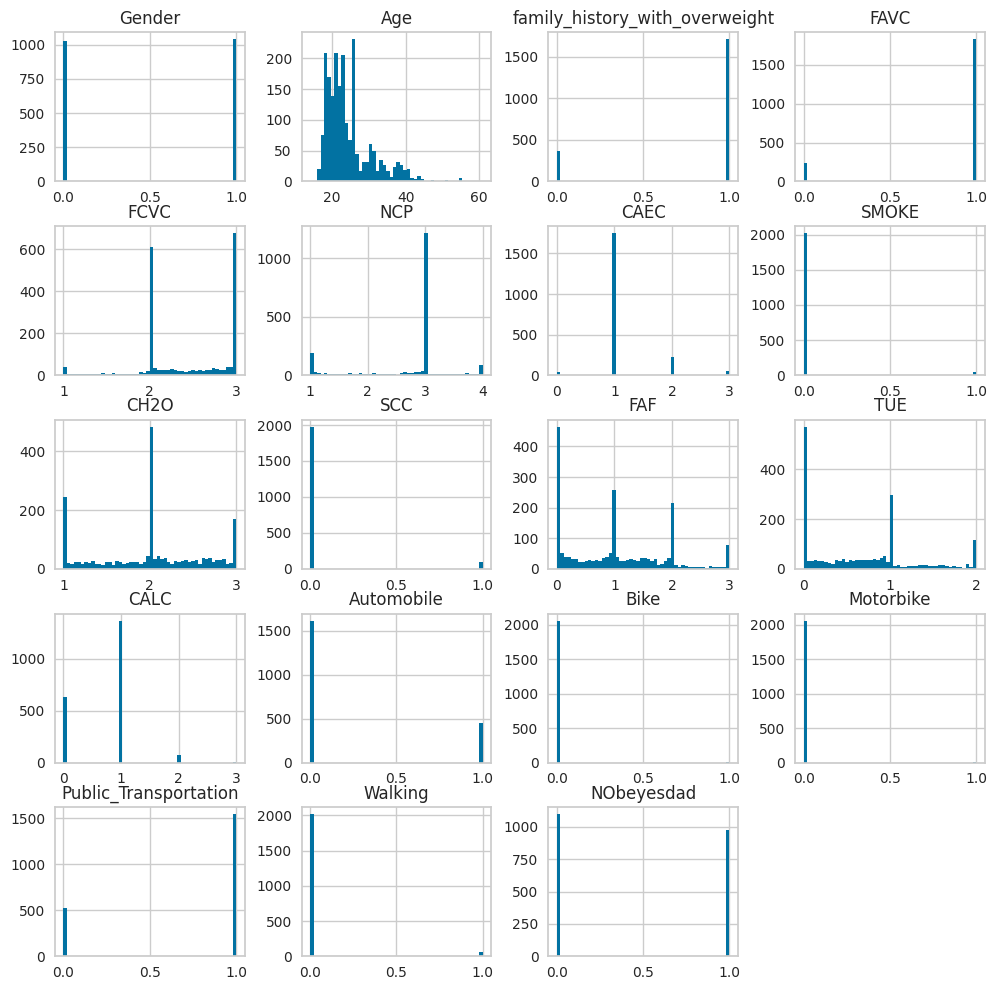

In [19]:
# Histogram Dataset

df.hist(bins=50, figsize=(12,12))
plt.show()

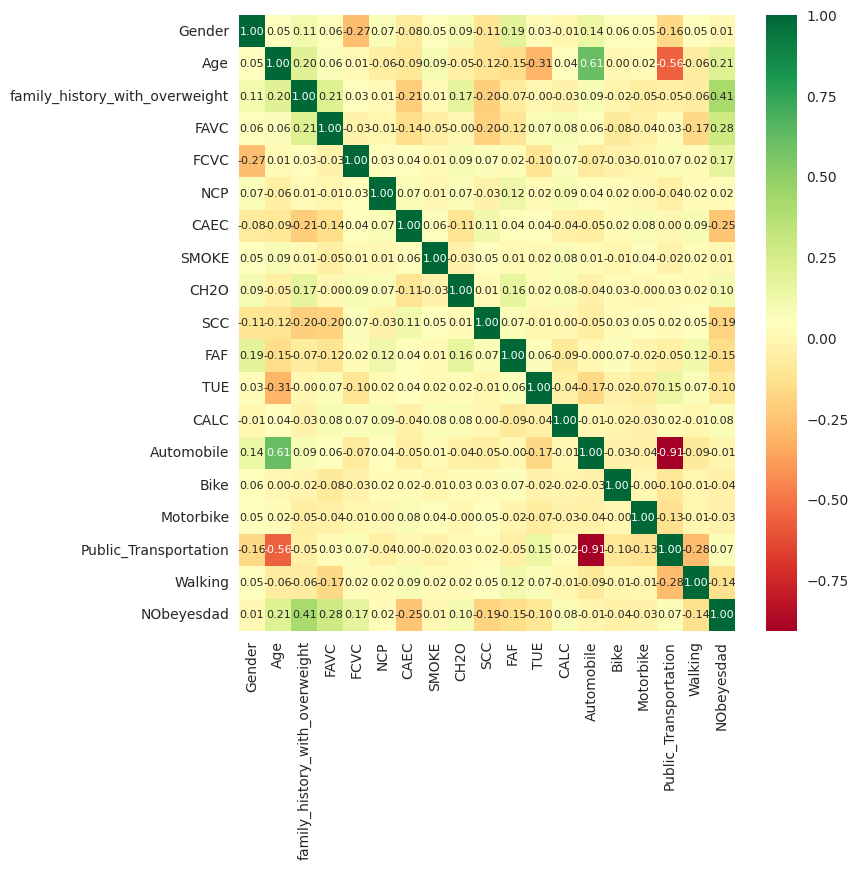

In [20]:
# Heatmap

df_corr = df.corr()
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 8}, ax=ax)
plt.show()

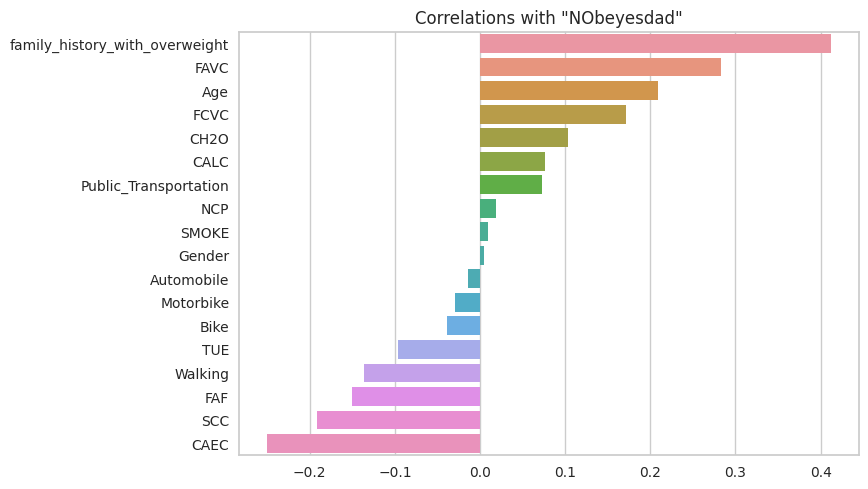

In [21]:
# Correlations with "NObeyesdad"

limit = -1.0

data = df.corr()["NObeyesdad"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "NObeyesdad"')
plt.show()

## <b><div style='padding:15px;background-color:#e13253;color:white;border-radius:40px;font-size:110%;text-align: center'>6  |  Algorithms</div></b>

In [22]:
# assign X and y values
X,y=df.drop("NObeyesdad",axis=1),df[['NObeyesdad']]

In [23]:
from sklearn.model_selection import train_test_split

# split the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1654, 18), (414, 18), (1654, 1), (414, 1))

In [24]:
# Classification Algorithms

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

g=GaussianNB()
b=BernoulliNB()
k=KNeighborsClassifier()
l=LogisticRegression()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
gb=GradientBoostingClassifier()
ct=CatBoostClassifier(verbose=False)

# fit and predict model
g.fit(X_train,y_train)
b.fit(X_train,y_train)
k.fit(X_train,y_train)
l.fit(X_train,y_train)
d.fit(X_train,y_train)
r.fit(X_train,y_train)
gb.fit(X_train,y_train)
ct.fit(X_train,y_train)

predG=g.predict(X_train)
predB=b.predict(X_train)
predK=k.predict(X_train)
predL=l.predict(X_train)
predD=d.predict(X_train)
predR=r.predict(X_train)
predGB=gb.predict(X_train)
predCT=ct.predict(X_train)

In [25]:
# Print 'accuracy scores'

print('Accuracy Scores:')
print("GaussianNB:       ", accuracy_score(predG,y_train))
print("BernoulliNB:      ", accuracy_score(predB,y_train))
print("KNeighbours:      ", accuracy_score(predK,y_train))
print("LogisticReg:      ", accuracy_score(predL,y_train))
print("DecisionTree:     ", accuracy_score(predD,y_train))
print("RandomForest:     ", accuracy_score(predR,y_train))
print("GradientBoosting: ", accuracy_score(predGB,y_train))
print("CatBoost:         ", accuracy_score(predGB,y_train))


Accuracy Scores:
GaussianNB:        0.7551390568319226
BernoulliNB:       0.7212817412333736
KNeighbours:       0.9171704957678356
LogisticReg:       0.7744860943168077
DecisionTree:      1.0
RandomForest:      1.0
GradientBoosting:  0.9256348246674728
CatBoost:          0.9256348246674728


<div class="alert alert-block alert-info" style="background-color:#d5f4da;color:#e13253;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> Let's choose RandomForest because this algorithm showed one of the best results.</div>

## <b><div style='padding:15px;background-color:#e13253;color:white;border-radius:40px;font-size:110%;text-align: center'>7  |  RandomForestClassifier</div></b>

In [26]:
# Defining y e X
y = df["NObeyesdad"]
X = df.drop("NObeyesdad", axis="columns")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1654, 18), (414, 18), (1654,), (414,))

In [28]:
# RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(criterion="gini", min_samples_split=2)

# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# Predict the Test set results

y_pred = rfc.predict(X_test)

In [30]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.9444


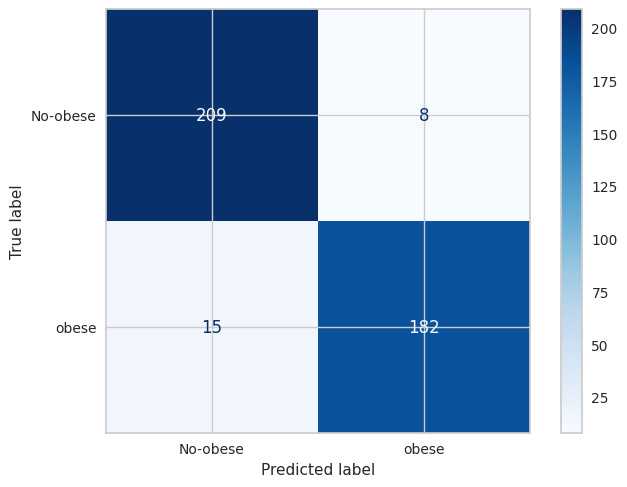

In [31]:
# ConfusionMatrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = plt.cm.Blues, normalize = None, display_labels = ['No-obese', 'obese'])

<div class="alert alert-block alert-info" style="background-color:#d5f4da;color:#e13253;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> 
Let's try to reduce the Obese is No-Obese predictions. This is not good when it comes to medicine.</div>

**Prioritizing reducing No-Obese predictions being Obese using BalancedRandomForestClassifier.**

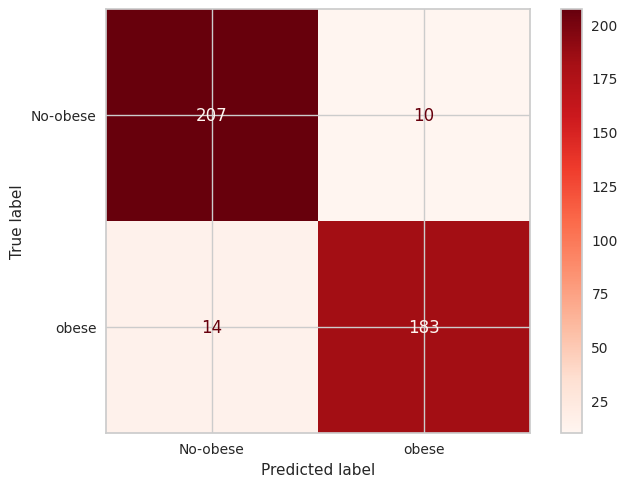

In [32]:
from imblearn.ensemble import BalancedRandomForestClassifier

brfc = BalancedRandomForestClassifier(random_state=42)
brfc.fit(X_train, y_train)
y_pred = brfc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = plt.cm.Reds, normalize = None, display_labels = ['No-obese', 'obese'])

<div class="alert alert-block alert-info" style="background-color:#d5f4da;color:#e13253;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> Okay, now we've narrowed down the predictions that obese are No-obese.</div>

In [33]:
# classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       217
           1       0.95      0.93      0.94       197

    accuracy                           0.94       414
   macro avg       0.94      0.94      0.94       414
weighted avg       0.94      0.94      0.94       414



In [34]:
# classification_report_imbalanced

from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.95      0.93      0.95      0.94      0.89       217
          1       0.95      0.93      0.95      0.94      0.94      0.88       197

avg / total       0.94      0.94      0.94      0.94      0.94      0.89       414



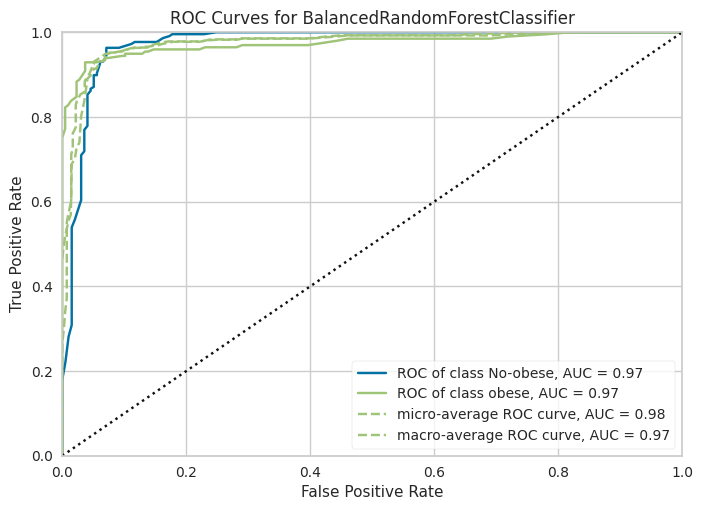

<Axes: title={'center': 'ROC Curves for BalancedRandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [35]:
# ROCAUC

visualizer_ROCAUC = ROCAUC(brfc, classes=["No-obese", "obese"])

visualizer_ROCAUC.fit(X_train, y_train)       
visualizer_ROCAUC.score(X_test, y_test)        
visualizer_ROCAUC.show()  

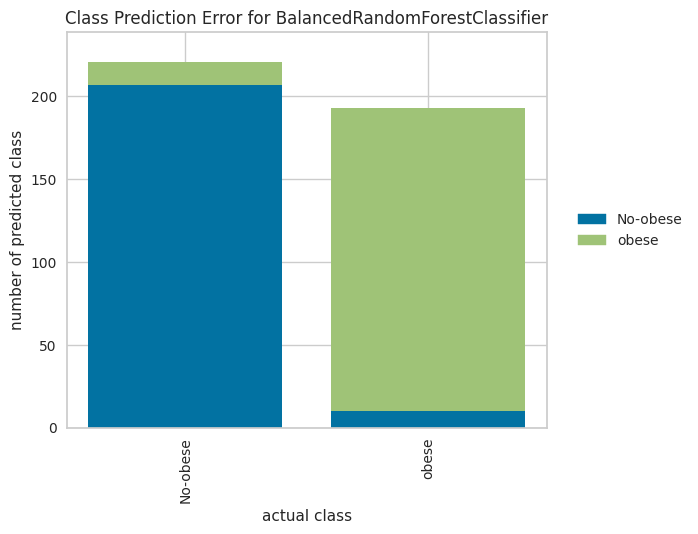

<Axes: title={'center': 'Class Prediction Error for BalancedRandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [36]:
# ClassPredictionError
from yellowbrick.classifier import ClassPredictionError

visualizer_Error = ClassPredictionError(brfc, classes=["No-obese", "obese"])

visualizer_Error.fit(X_train, y_train)        
visualizer_Error.score(X_test, y_test)        
visualizer_Error.show() 

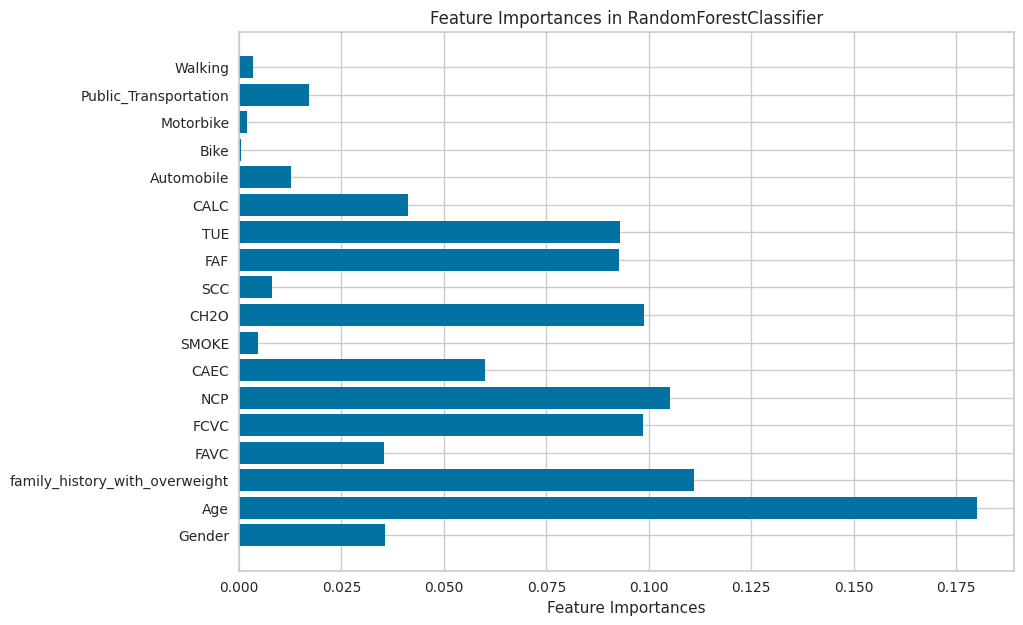

In [37]:
# Feature Importances in Random Forest

feature_names = rfc.feature_names_in_
feature_importances = rfc.feature_importances_

f, ax = plt.subplots(figsize=(10, 7))
ax.barh(range(len(feature_importances)), feature_importances)
ax.set_yticks(range(len(feature_importances)))
ax.set_yticklabels(feature_names)
ax.set_title("Feature Importances in RandomForestClassifier")
ax.set_xlabel("Feature Importances")
plt.show()

## <b><div style='padding:15px;background-color:#e13253;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked it, please upvote. Thank you very much.</div></b>